# 江苏省政府工作报告文本分析

## 文本预处理

### 爬虫获取政府工作报告原始文本

In [1]:
### 导入相关库
from urllib import request
import re
import jieba.posseg as pseg
import pandas as pd

In [2]:
### 定义get方法爬虫函数
def get(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
    req = request.Request(url, headers=headers)
    res = request.urlopen(req)
    html = res.read().decode('utf-8')
    return html

In [ ]:
### 获取发布政府工作报告的网页链接
url0 = 'https://www.jiangsu.gov.cn/col/col33720/index.html?uid=158542&pageNum=1'
html0 = get(url0)
p_link = r"<li><a href='([^<]+)'[^s]title"
links = re.findall(p_link, html0)
links.insert(4, '/art/2020/1/22/art_33720_8955845.html') # 2020年链接缺失，手动添加
links

['/art/2024/1/29/art_33720_11138104.html',
 '/art/2023/1/28/art_33720_10733780.html',
 '/art/2022/1/25/art_33720_10583547.html',
 '/art/2021/2/2/art_33720_9744791.html',
 '/art/2020/1/22/art_33720_8955845.html',
 '/art/2019/1/24/art_33720_8104543.html',
 '/art/2018/2/13/art_33720_7489314.html',
 '/art/2017/2/17/art_33720_2516921.html',
 '/art/2016/2/18/art_33720_2516920.html',
 '/art/2015/2/9/art_33720_2516919.html',
 '/art/2014/2/28/art_33720_2516918.html',
 '/art/2013/2/22/art_33720_2516917.html',
 '/art/2012/2/20/art_33720_2516916.html',
 '/art/2011/2/23/art_33720_2516915.html',
 '/art/2010/2/3/art_33720_2516914.html',
 '/art/2009/2/12/art_33720_2516913.html',
 '/art/2008/2/13/art_33720_2516912.html',
 '/art/2007/2/22/art_33720_2516911.html',
 '/art/2006/2/16/art_33720_2516910.html',
 '/art/2005/2/10/art_33720_2516909.html']

In [ ]:
### 获取历年政府工作报告的标题和内容
for i in range(len(links)):
    url = 'https://www.jiangsu.gov.cn' + links[i]
    html = get(url)
    title = re.findall(r'<div class="sp_title">([^<]+)</div>', html)[0]
    content_pattern = re.compile(r'<!--ZJEG_RSS\.content\.begin-->(.*?)<!--ZJEG_RSS\.content\.end-->', re.S)
    content = re.findall(content_pattern, html)
    with open('data/江苏省/' + title + '.txt', 'w', encoding='utf-8') as f:
        f.write(content[0]) # 写入txt文件保存
    print(title)

江苏省政府2024年政府工作报告
江苏省政府2023年政府工作报告
江苏省政府2022年政府工作报告
江苏省政府2021年政府工作报告
江苏省政府2020年政府工作报告
江苏省政府2019年政府工作报告
江苏省政府2018年政府工作报告
江苏省政府2017年政府工作报告
江苏省政府2016年政府工作报告
江苏省政府2015年政府工作报告
江苏省政府2014年政府工作报告
江苏省政府2013年政府工作报告
江苏省政府2012年政府工作报告
江苏省政府2011年政府工作报告
江苏省政府2010年政府工作报告
江苏省政府2009年政府工作报告
江苏省政府2008年政府工作报告
江苏省政府2007年政府工作报告
江苏省政府2006年政府工作报告
江苏省政府2005年政府工作报告


### 对原始文本进行分词

In [58]:
### 定义分词函数
def tokenize(text):
    words = pseg.lcut(text, HMM=True) # 使用jieba分词并进行词性标注，开启HMM提高分词准确率
    with open('cn_stopwords.txt', 'r', encoding='utf-8') as f: # 加载中文停用词表
        stopwords = f.read().split('\n')
        stopwords.extend(['年月日', '宋体', '楷体', '黑体', '江苏省', '江苏', '工作', '习近平', '发展', '建设']) # 视情况手动补充停用词
        filtered_words = [
            word.word for word in words
            if word.word not in stopwords # 去除停用词
            and len(word.word) > 1 # 去除单字词
            and word.flag not in ['c', 'd', 'm', 'nr', 'ns', 'p', 'q', 'r', 'v', 't'] # 去除指定词性词
            ]
    return filtered_words

In [59]:
### 分词后，保存到DataFrame
df = pd.DataFrame(columns=['year', 'tokens'])
for i in range(2005, 2025):
    with open('data/江苏省/江苏省政府' + str(i) + '年政府工作报告.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        ctext = ''.join(re.findall(r'[\u4e00-\u9fff]+', text)) # 只保留中文字符
        words = tokenize(ctext) # 分词
        df.loc[df.shape[0] + 1] = {'year': i, 'tokens': ' '.join(words)}
df

,year,tokens
1,2005,代表 代表 江苏省人民政府 大会 报告 政协委员 意见 回顾过去 改革开放 经济社会 显著 ...
2,2006,政府 报告 人民代表大会 会议 省长 代表 代表 江苏省人民政府 大会 报告 步入 时期 中...
3,2007,政府 报告 人民代表大会 会议 省长 代表 代表 江苏省人民政府 大会 报告 政协委员 意见...
4,2008,政府 报告 人民代表大会 会议 代省长 志军 代表 代表 江苏省人民政府 大会 报告 建议 ...
5,2009,政府 报告 人民代表大会 会议 省长 志军 代表 代表 人民政府 大会 报告 政协委员 意见...
6,2010,政府 报告 人民代表大会 会议 省长 志军 代表 代表 人民政府 大会 报告 政协委员 意见...
7,2011,政府 报告 人民代表大会 会议 代表 代表 江苏省人民政府 大会 报告 政协委员 意见 时期...
8,2012,政府 报告 人民代表大会 会议 省长 代表 代表 江苏省人民政府 大会 报告 政协委员 意见...
9,2013,政府 报告 人民代表大会 会议 省长 代表 代表 江苏省人民政府 大会 报告 政协委员 意见...
10,2014,政府 报告 人民代表大会 会议 省长 代表 代表 江苏省人民政府 大会 报告 政协委员 意见...


## 关键词分析

### 提取每年政府工作报告中的关键词

In [4]:
### 导入相关库
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
### 计算TF-IDF值
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['tokens']) # 生成TF-IDF值矩阵
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=df['year']) # 转换为DataFrame
tfidf_df

,一以贯之,一体,一体化,一刀切,一卡通,一号线,一如既往,一委,一室,一岗双责,...,黄标,黄金,黄金水道,黑天鹅,黑臭,鼓舞人心,鼻子,齐心协力,龙头,龙头企业
year,,,,,,,,,,,,,,,,,,,,,
2005,0.000000,0.000000,0.010100,0.000000,0.000000,0.016137,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.016137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016775,0.005557
2006,0.000000,0.000000,0.008951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007433,0.004925
2007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008321,0.005513
2008,0.000000,0.000000,0.009245,0.000000,0.000000,0.000000,0.000000,0.000000,0.014772,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007678,0.010174
2009,0.000000,0.000000,0.022644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009402,0.000000
2010,0.000000,0.000000,0.022629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009396,0.006226
2011,0.000000,0.000000,0.060274,0.000000,0.000000,0.000000,0.000000,0.012731,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005527
2012,0.000000,0.000000,0.033071,0.000000,0.000000,0.000000,0.000000,0.013970,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012797,0.009155,0.006066
2013,0.000000,0.000000,0.034561,0.000000,0.000000,0.000000,0.000000,0.014599,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013374,0.000000,0.000000


In [61]:
### 提取TF-IDF值最高的关键词
topwords_df = pd.DataFrame(columns=['year', 'topwords'])
for i in tfidf_df.index:
    tfidf_scores = tfidf_df.loc[i]
    topwords = tfidf_scores.sort_values(ascending=False).index.tolist() # 根据TF-IDF值从高到低排序，提取每年的关键词
    topwords_df.loc[topwords_df.shape[0] + 1] = {'year': i, 'topwords': ' '.join(topwords)}
topwords_df

,year,topwords
1,2005,经济 社会 政府 企业 积极 农村 改革 重点 水平 人民 管理 科学 环境 农业 努力 生...
2,2006,经济 社会 农村 产业 企业 重点 文化 政府 水平 改革 农业 基本 服务业 人民 事业 ...
3,2007,经济 社会 农村 服务 重点 政府 企业 服务业 管理 水平 产业 积极 文化 改革 全省 ...
4,2008,社会 政府 经济 企业 农村 全面 文化 基本 群众 重点 积极 水平 人民 服务 科技 全...
5,2009,经济 企业 社会 农村 积极 改革 稳定 政府 力度 市场 产业 农业 水平 制度 全省 项...
6,2010,经济 社会 重点 农村 积极 企业 着力 改革 政府 住房 政策 投资 服务 基本 机构 产...
7,2011,经济 社会 基本 产业 积极 改革 水平 城乡 力度 农村 重点 政府 体系 全面 企业 大...
8,2012,经济 社会 文化 服务 工程 改革 积极 重点 民生 管理 水平 企业 国家 升级 大力 城...
9,2013,社会 经济 文化 企业 水平 管理 城乡 基本 改革 教育 深化 重点 工程 体系 政府 生...
10,2014,改革 经济 社会 政府 制度 文化 企业 积极 综合 深化 服务 试点 农村 产业 农业 优...


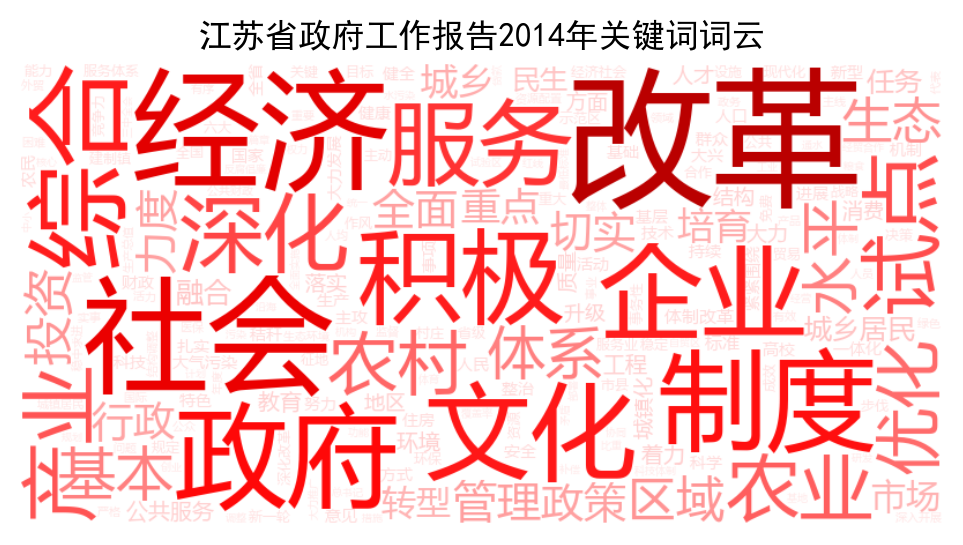

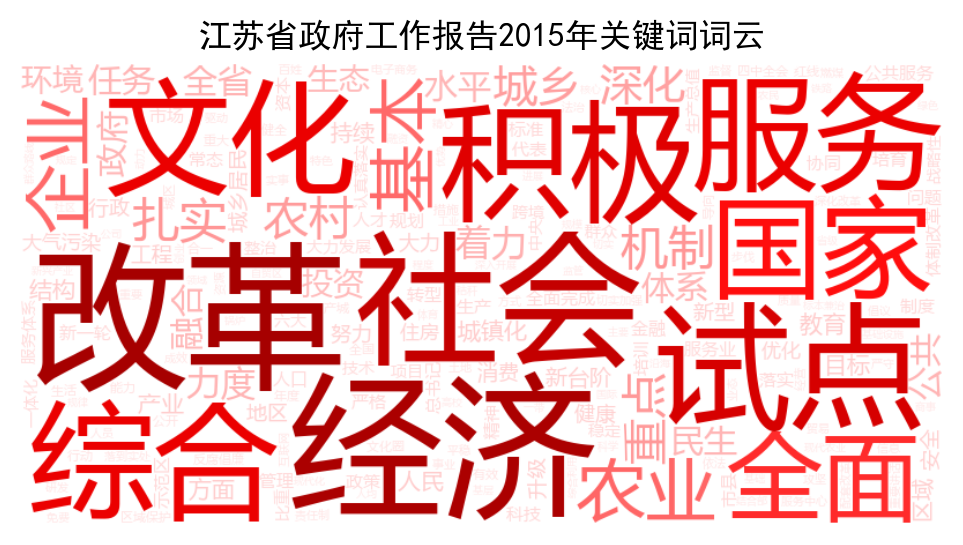

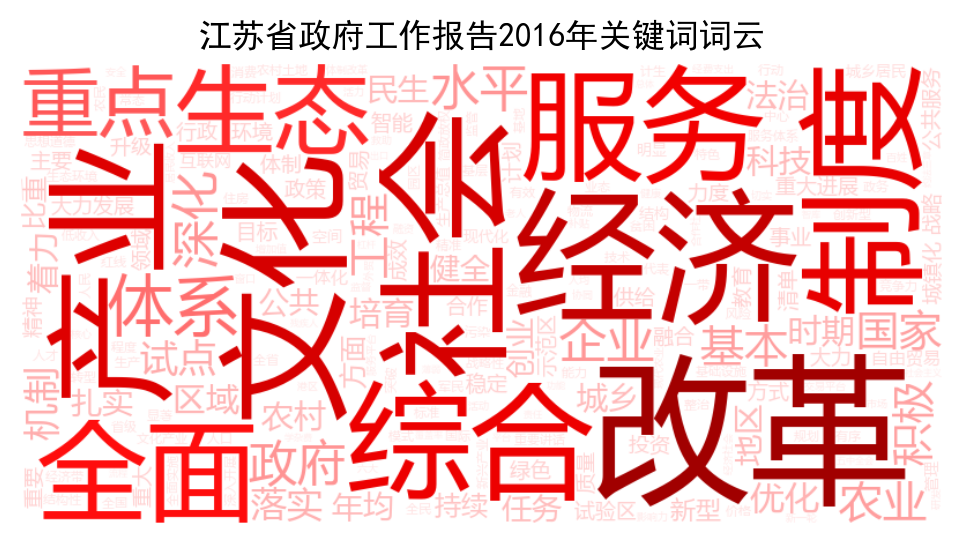

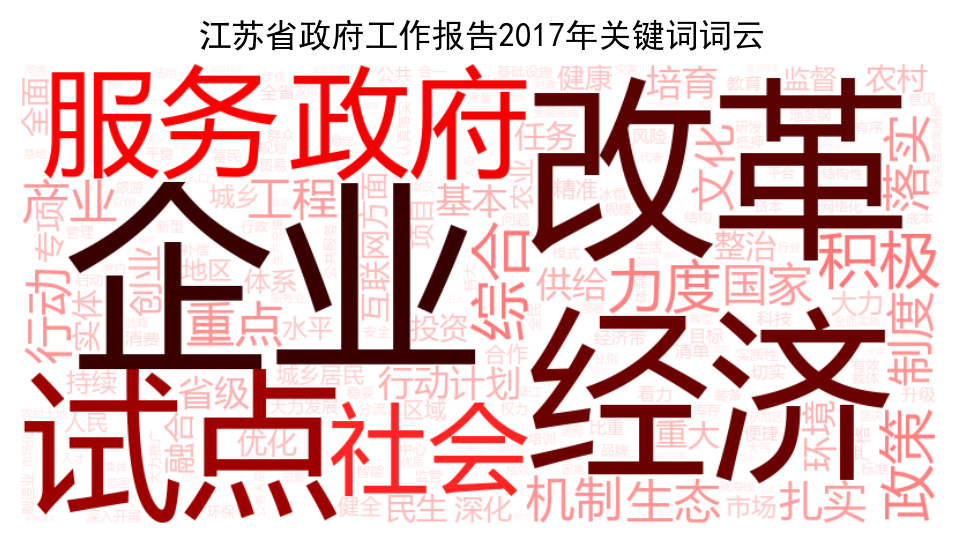

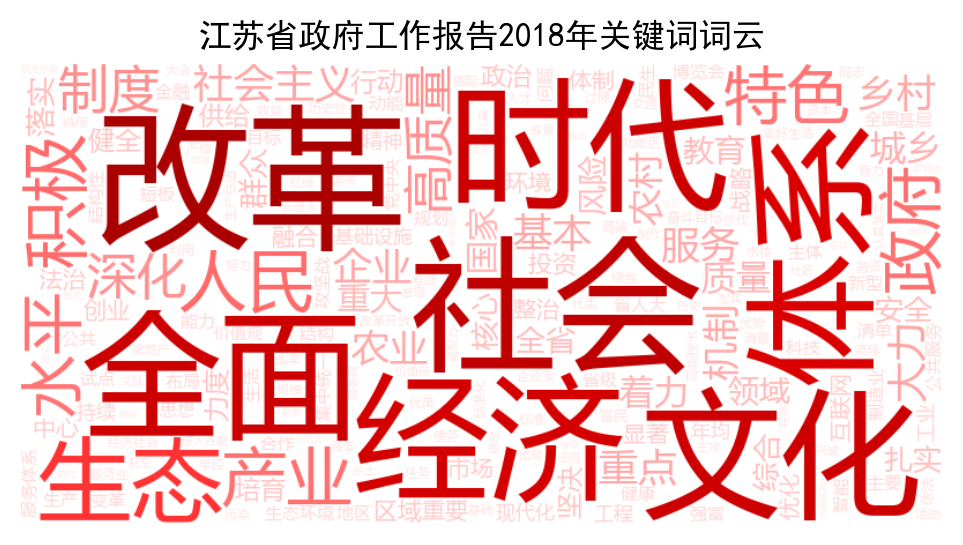

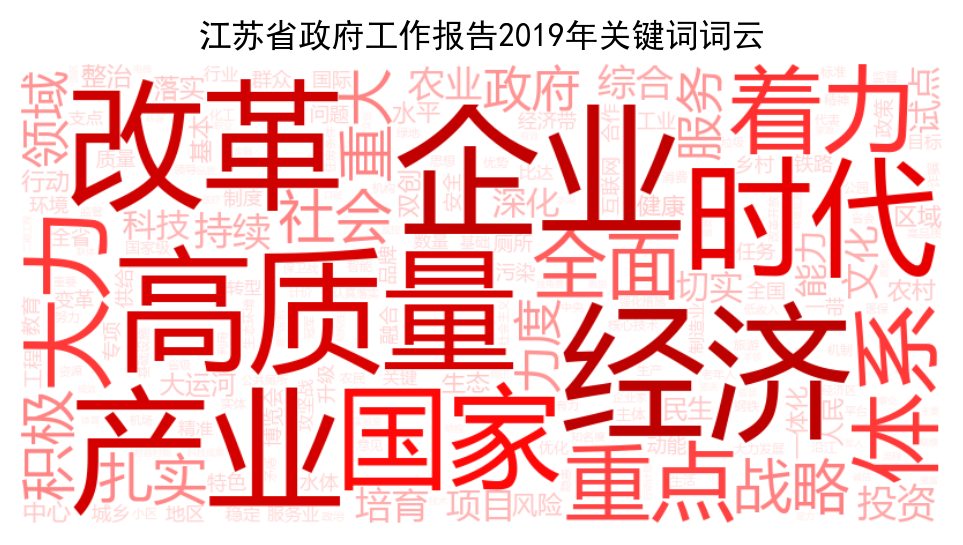

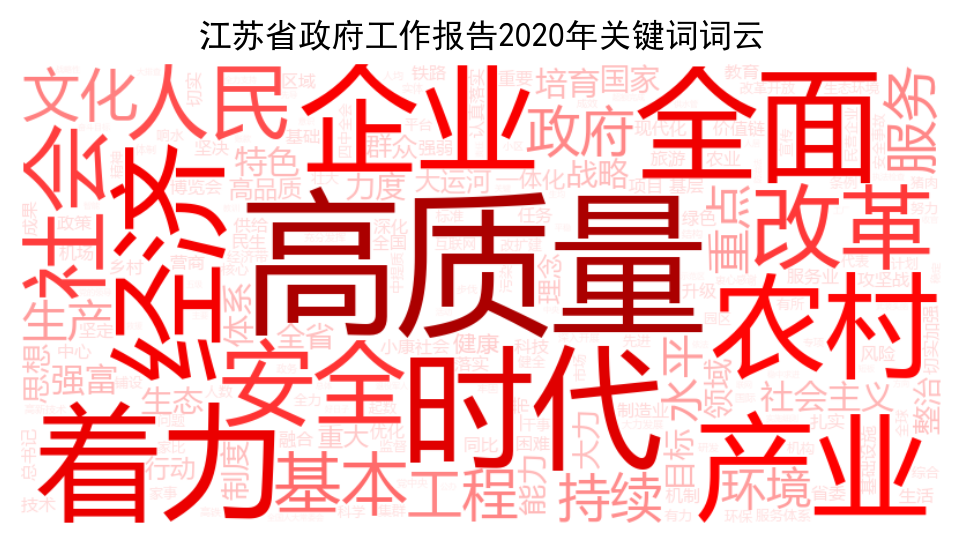

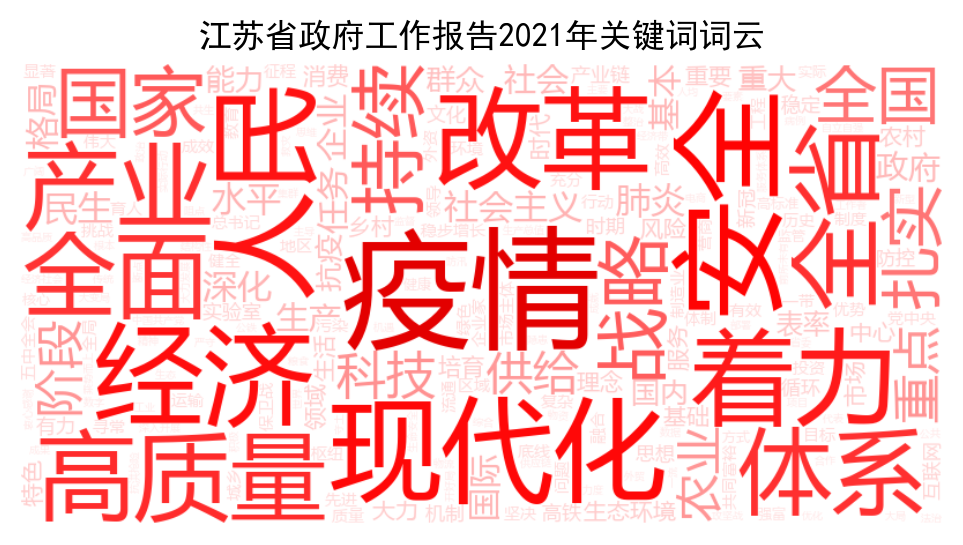

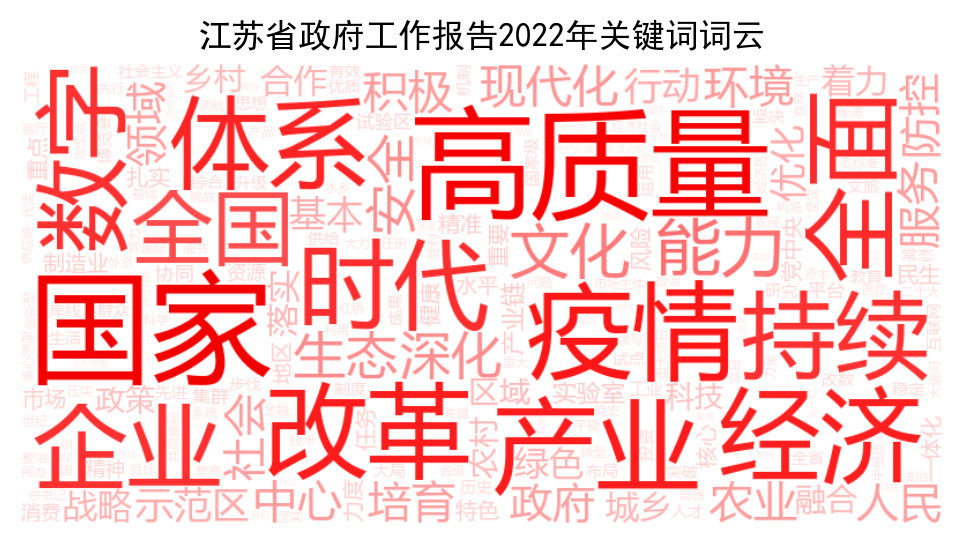

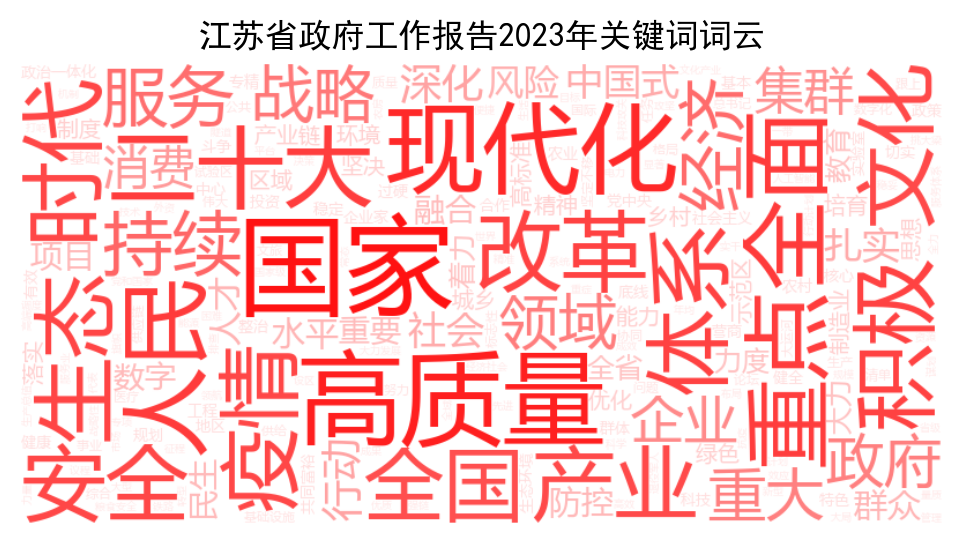

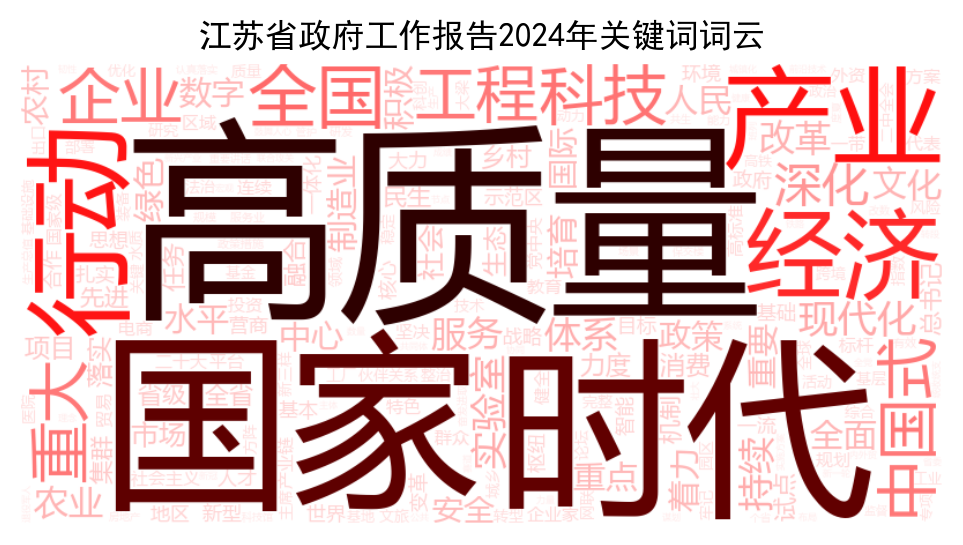

In [62]:
### 通过词云图可视化
def color_func(word, font_size, position, orientation, random_state=None, **kwargs): # 定义词云颜色
    hue = 0
    lightness = 100 - (font_size / 100) * 50
    return "hsl({}, 100%, {}%)".format(hue, lightness)

def generate_wordcloud(year, tfidf_scores):
    wordcloud = WordCloud(font_path='msyh.ttc',
                          width=800,
                          height=400,
                          background_color='white',
                          color_func=color_func
                          ).generate_from_frequencies(tfidf_scores) # 根据TF-IDF值生成词云
    plt.figure(figsize=(6, 3), dpi=200)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'江苏省政府工作报告{year}年关键词词云')
    plt.axis('off')
    plt.show()

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
for year in range(2014, 2025): # 生成近10年的词云图
    tfidf_scores = tfidf_df.loc[year]
    generate_wordcloud(year, tfidf_scores)

### 构建政府关注度指标

In [65]:
### 导入相关库
import numpy as np
import seaborn as sns

In [37]:
### 构建关键词列表
digital_words = '数字经济、数据安全、智慧化、智能经济、数据服务、信息经济、互联网、云平台、智能制造、物联网、数字化、数字产业、信息技术、区块链、数字基础设施、大数据、数据治理、云计算、数字生活、智能化、人工智能、数据共享、机器人、工业互联网、数字技术'.split('、')
green_words = '生态、污染、生态环境、节能、新能源、绿化、环境保护、环保、绿色、可持续发展、排放、环境治理'.split('、')

In [67]:
### 计算政府对绿色环保和数字化的关注度
df_new = pd.DataFrame(columns=['year', 'green', 'digital'])
for i in df.index:
    words = df.loc[i, 'tokens'].split(' ')
    year = df.loc[i, 'year']
    green_score = 0
    for word in words:
        if word in green_words:
            green_score += 1
    digital_score = 0
    for word in words:
        if word in digital_words:
            digital_score += 1
    df_new.loc[df_new.shape[0] + 1] = {'year': year,
                                       'green': np.log(green_score / len(words) + 1), # 计算绿色环保关注度
                                       'digital': np.log(digital_score / len(words) + 1)} # 计算数字化关注度
df_new

,year,green,digital
1,2005,0.004297,0.000287
2,2006,0.004920,0.000000
3,2007,0.007989,0.000000
4,2008,0.008881,0.000235
5,2009,0.005365,0.000299
6,2010,0.007600,0.000000
7,2011,0.008933,0.000528
8,2012,0.007171,0.000300
9,2013,0.012719,0.000936
10,2014,0.013221,0.000605


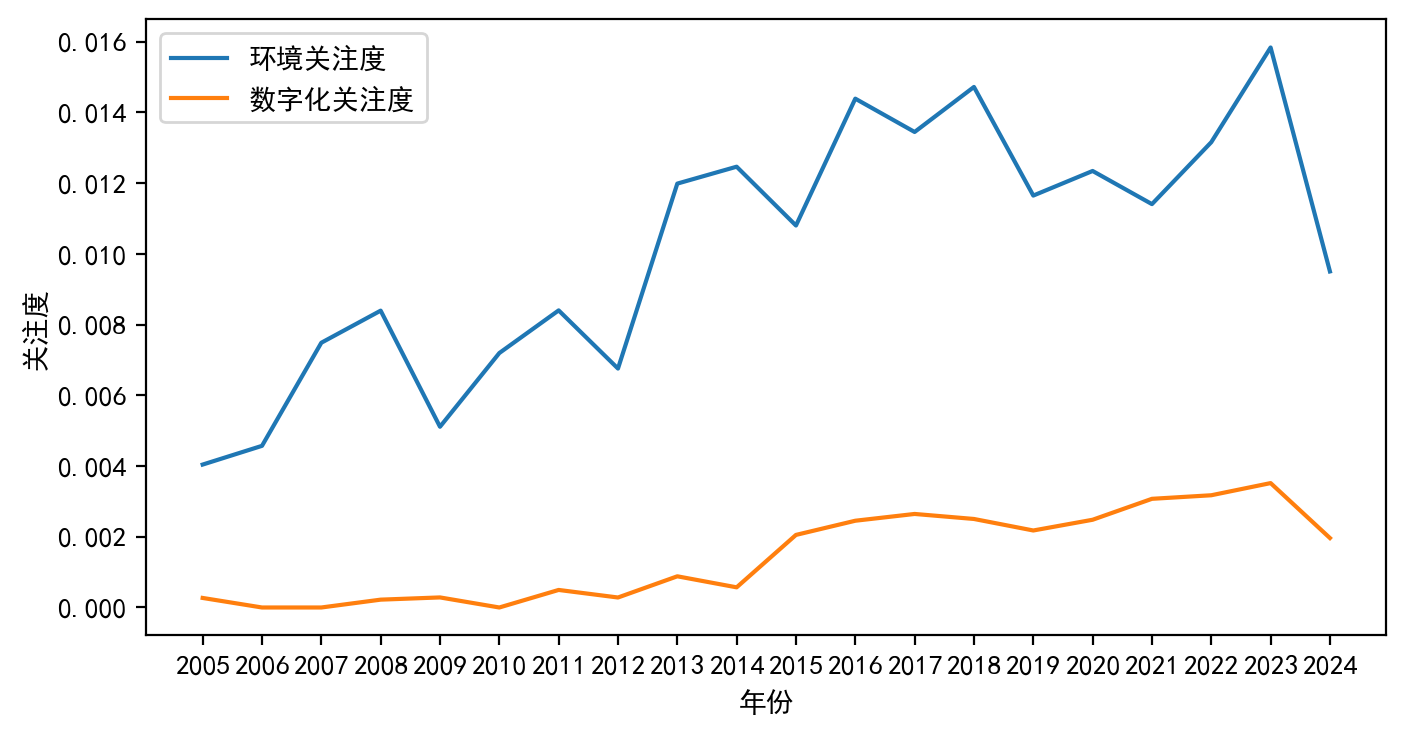

In [ ]:
### 可视化
plt.figure(figsize=(8, 4), dpi=200)

sns.lineplot(data=df_new, x='year', y='green', label='环境关注度')
sns.lineplot(data=df_new, x='year', y='digital', label='数字化关注度')

plt.legend()
plt.ylabel('关注度')
plt.xlabel('年份')

plt.xticks(df_new['year'])

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

### 政府关注度的影响

In [52]:
### 合并关注度数据
df0 = pd.read_excel('data/江苏省.xls')
for i in df0.index:
    year = df0.loc[i, '年份']
    if year in df_new['year'].values:
        green = df_new.loc[df_new['year'] == year, 'green'].values[0]
        digital = df_new.loc[df_new['year'] == year, 'digital'].values[0]
        df0.loc[i, '环境关注度'] = green
        df0.loc[i, '数字化关注度'] = digital
df0

,年份,一般工业固体废物产生量,信息技术服务收入,环境关注度,数字化关注度
0,2000,3038.19,NaN,NaN,NaN
1,2001,3553.00,NaN,NaN,NaN
2,2002,3796.00,NaN,NaN,NaN
3,2003,3893.70,NaN,NaN,NaN
4,2004,4672.53,NaN,NaN,NaN
5,2005,5757.37,NaN,0.004041,0.000270
6,2006,7195.04,NaN,0.004571,0.000000
7,2007,7354.22,NaN,0.007487,0.000000
8,2008,7724.00,NaN,0.008394,0.000222
9,2009,8027.81,NaN,0.005111,0.000285


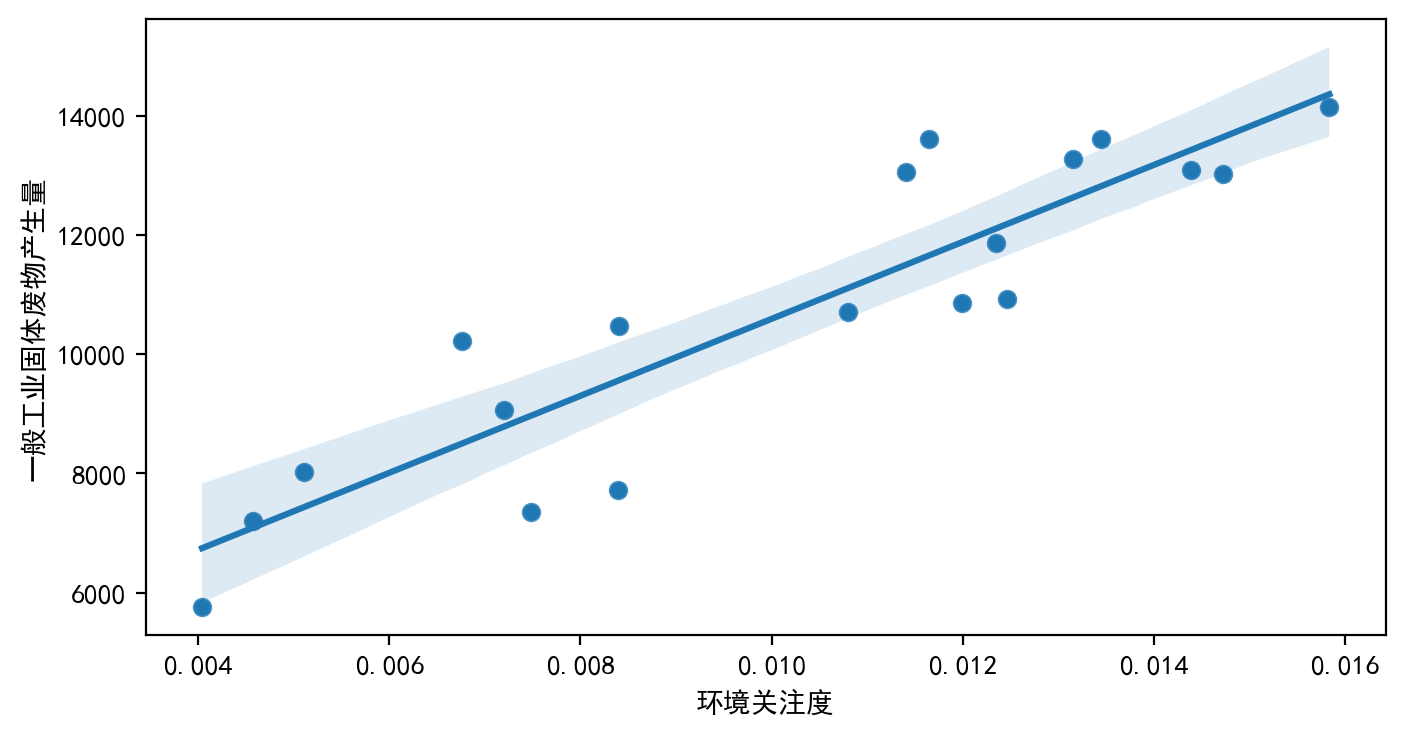

In [55]:
### 可视化
plt.figure(figsize=(8, 4), dpi=200)

sns.scatterplot(data=df0, x='环境关注度', y='一般工业固体废物产生量')
sns.regplot(data=df0, x='环境关注度', y='一般工业固体废物产生量')

plt.xlabel('环境关注度')
plt.ylabel('一般工业固体废物产生量')

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()

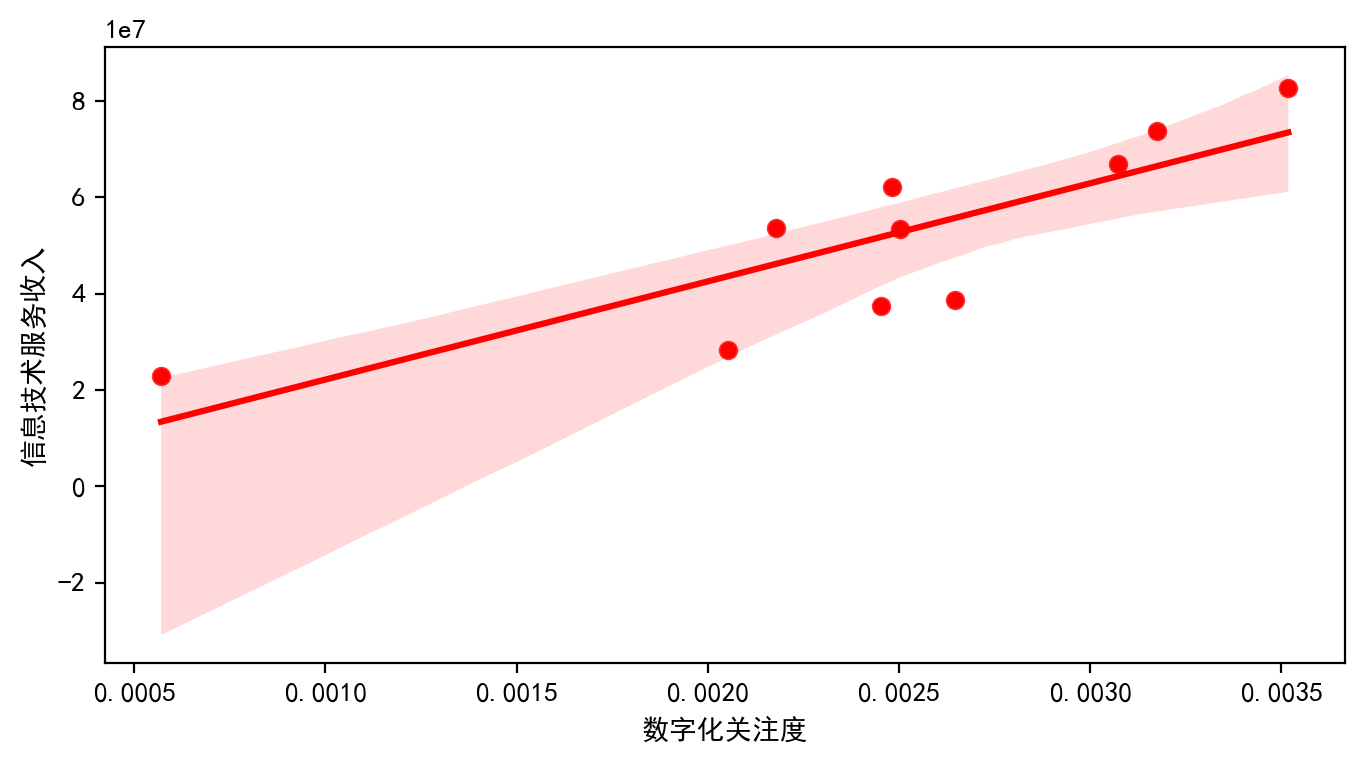

In [57]:
### 可视化
plt.figure(figsize=(8, 4), dpi=200)

sns.scatterplot(data=df0, x='数字化关注度', y='信息技术服务收入', color = 'r')
sns.regplot(data=df0, x='数字化关注度', y='信息技术服务收入', color = 'r')

plt.xlabel('数字化关注度')
plt.ylabel('信息技术服务收入')

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.show()